In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df_books = pd.read_csv(r"C:\Users\Midal\OneDrive\Tài liệu\DatasetsAI\Books.csv", dtype={'Year-Of-Publication': str})
df_users = pd.read_csv(r"C:\Users\Midal\OneDrive\Tài liệu\DatasetsAI\Users.csv")
df_ratings = pd.read_csv(r"C:\Users\Midal\OneDrive\Tài liệu\DatasetsAI\Ratings.csv")

DATASETS

In [2]:
df_books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [5]:
df_books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271358 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


In [6]:
df_books.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            2
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

In [7]:
df_users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [8]:
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [9]:
df_users.isnull().sum()

User-ID          0
Location         0
Age         110762
dtype: int64

In [10]:
df_ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [11]:
df_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [12]:
df_ratings.isnull().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

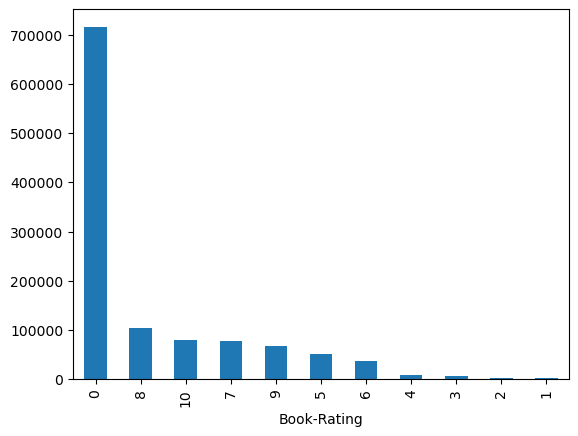

In [13]:
df_ratings['Book-Rating'].value_counts().plot(kind='bar')
plt.show()

In [14]:
df_book_ratings = df_ratings\
    .groupby('ISBN')['Book-Rating']\
    .count()\
    .reset_index()\
    .sort_values('Book-Rating', ascending=False)

df_book_ratings.describe()


,Book-Rating
count,340556.000000
mean,3.376185
std,12.436252
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,2502.000000


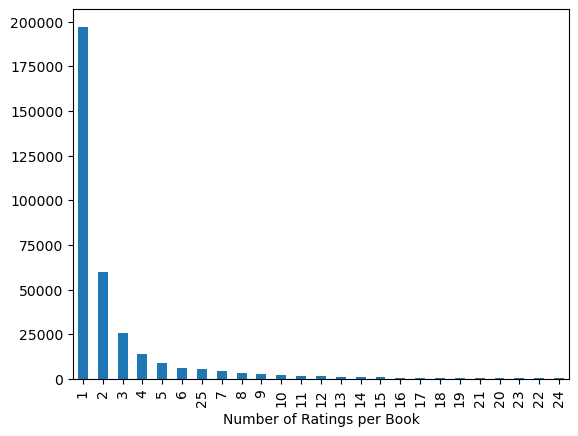

In [15]:
df_book_ratings = df_ratings\
    .groupby('ISBN')['Book-Rating']\
    .count()\
    .clip(upper=25)\
    .sort_values(ascending=False)
df_book_ratings.value_counts().plot(kind='bar')
plt.xlabel('Number of Ratings per Book')
plt.show()

In [16]:
df_user_ratings = df_ratings\
    .groupby('User-ID')['Book-Rating']\
    .count()\
    .reset_index()\
    .sort_values('Book-Rating', ascending=False)

df_user_ratings.describe()


,User-ID,Book-Rating
count,105283.000000,105283.000000
mean,139474.738619,10.920851
std,80574.738184,90.562825
min,2.000000,1.000000
25%,69376.000000,1.000000
50%,139146.000000,1.000000
75%,209643.500000,4.000000
max,278854.000000,13602.000000


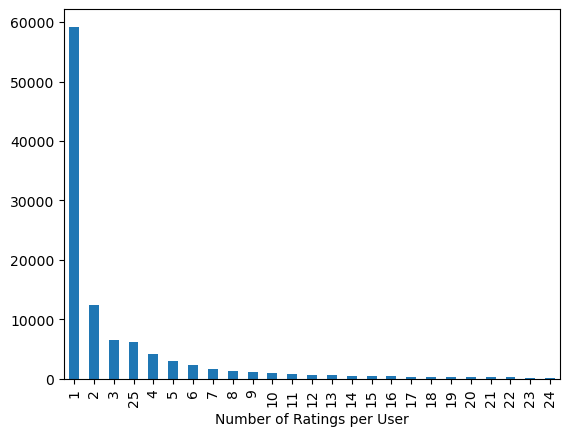

In [17]:
df_user_ratings = df_ratings\
    .groupby('User-ID')['Book-Rating']\
    .count()\
    .clip(upper=25)\
    .sort_values(ascending=False)
df_user_ratings.value_counts().plot(kind='bar')
plt.xlabel('Number of Ratings per User')
plt.show()

In [18]:

min_book_ratings = 10
min_book_ratings_mask = df_ratings['ISBN'].value_counts() > min_book_ratings

min_book_ratings_isbn = min_book_ratings_mask[min_book_ratings_mask].index.tolist()

print(min_book_ratings_mask.value_counts())
len(min_book_ratings_isbn)



count
False    324394
True      16162
Name: count, dtype: int64


16162

In [19]:
min_user_ratings = 10
min_user_ratings_mask = df_ratings['User-ID'].value_counts() > min_user_ratings

min_user_ratings_user_id = min_user_ratings_mask[min_user_ratings_mask].index.tolist()

print(min_user_ratings_mask.value_counts())
len(min_user_ratings_user_id)


count
False    93230
True     12053
Name: count, dtype: int64


12053

In [20]:
df_train = df_ratings[(df_ratings['ISBN'].isin(min_book_ratings_isbn)) & (df_ratings['User-ID'].isin(min_user_ratings_user_id))]
df_train

,User-ID,ISBN,Book-Rating
31,276762,034544003X,0
33,276762,0380711524,5
34,276762,0451167317,0
39,276762,3404611306,0
89,276798,3423084049,0
...,...,...,...
1149766,276704,0441007813,0
1149767,276704,0446353957,0
1149768,276704,0446605409,0
1149771,276704,0743211383,7


MODEL TRAINING

In [22]:
import surprise
from surprise import Reader, Dataset, BaselineOnly, KNNBasic, KNNBaseline
from surprise import KNNWithMeans, KNNWithZScore, NMF, NormalPredictor, SVD, SlopeOne
from surprise.model_selection import cross_validate

reader = Reader(rating_scale=(0, 10))

data = Dataset.load_from_df(df_train[['User-ID', 'ISBN', 'Book-Rating']], reader)


In [23]:
algos = []
algos.append(BaselineOnly())
algos.append(KNNBasic())
algos.append(KNNBaseline())
algos.append(KNNWithMeans())
algos.append(KNNWithZScore())
algos.append(NMF())
algos.append(NormalPredictor())
algos.append(SlopeOne())
algos.append(SVD())

benchmark = []
for algo in algos:
    algo_name = str(algo).split(' ')[0].split('.')[-1]
    print(f'Running with {algo_name}...')
    results = cross_validate(algo, data, measures=["RMSE", "MAE"], cv=5, verbose=True)
    algo_result = pd.DataFrame.from_dict(results).mean(axis=0)
    print(algo_result)
    algo_result = algo_result._append(pd.Series([algo_name], index=['algo']))
    benchmark.append(algo_result)
    
pd.DataFrame(benchmark).set_index('algo').sort_values('test_rmse')  

Running with BaselineOnly...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Evaluating RMSE, MAE of algorithm BaselineOnly on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    3.3932  3.3986  3.4101  3.3996  3.3948  3.3993  0.0059  
MAE (testset)     2.7902  2.7987  2.8019  2.7932  2.7889  2.7946  0.0050  
Fit time          1.28    1.21    1.38    1.46    1.44    1.35    0.10    
Test time         0.84    0.71    1.00    0.98    0.87    0.88    0.11    
test_rmse    3.399274
test_mae     2.794575
fit_time     1.351618
test_time    0.878471
dtype: float64
Running with KNNBasic...
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity ma

,test_rmse,test_mae,fit_time,test_time
algo,,,,
BaselineOnly,3.399274,2.794575,1.351618,0.878471
SVD,3.559044,2.803857,9.461739,0.996218
SlopeOne,3.627009,2.754399,17.784646,24.250165
KNNWithMeans,3.631435,2.731433,6.671065,11.555816
KNNBaseline,3.647199,2.791217,7.616712,12.413783
KNNWithZScore,3.649731,2.696364,6.400604,10.584725
NMF,3.932942,2.845917,15.518605,1.011549
KNNBasic,3.975647,3.042868,7.715338,11.518814
NormalPredictor,4.831886,3.767894,0.808698,1.010030


In [24]:
from surprise.model_selection import GridSearchCV

param_grid = {
    'bsl_options': {
        'method': ['als', 'sgd'],
        'n_epochs': [5, 10, 15,  20], 
        'learning_rate': [0.001, 0.003, 0.005]
    }
}

gs = GridSearchCV(BaselineOnly, param_grid, measures=["rmse"], cv=5)
gs.fit(data)

# best RMSE score
print(gs.best_score["rmse"])

# combination of parameters that gave the best RMSE score
print(gs.best_params["rmse"])

Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimati

In [25]:
# use the algorithm that yields the best rmse:
algo = gs.best_estimator["rmse"]
algo.fit(data.build_full_trainset())

Estimating biases using sgd...


In [26]:
from surprise.model_selection import train_test_split
from surprise import accuracy

trainset, testset = train_test_split(data, test_size=0.25)
algo.fit(trainset)
predictions = algo.test(testset)
accuracy.rmse(predictions)

Estimating biases using sgd...
RMSE: 3.3993


3.399310843771166

User Based Collaborative Filtering

In [27]:
def unique(list1):
    list_set = set(list1)
    unique_list = list(list_set)
    return unique_list

def recommend_items(user_id, model, data, n=5):
    # items rated by user
    items_rated_by_user = [record[1] for record in data if record[0] == user_id]
    # remove items that already rated by user
    items_to_predict = [record[1] for record in testset if record[1] not in items_rated_by_user]
    # get unique items
    items_to_predict = unique(items_to_predict)
    
    # predict ratings for the items not rated by the user
    predictions = [model.predict(user_id, item) for item in items_to_predict]
    
    # sort predictions by estimated rating
    recommendations = sorted(predictions, key=lambda x: x.est, reverse=True)
    
    # extract item ids from recommendations
    recommended_items = [(rec.iid, rec.est) for rec in recommendations[:n]]
    return recommendations, recommended_items

def recommend_items_user(user_ids):
    for user_id in user_ids:
        print("Recommended books for user", user_id, ":")
        _, recommended_items = recommend_items(user_id, algo, testset, 5)
        index = 1
        for item in recommended_items:
            item_id = item[0]
            est_rating = np.round(item[1], 2)
            book_info = df_books.loc[df_books['ISBN']==item_id].iloc[0]
            print(f'\t{index}. {book_info["Book-Title"]} by {book_info["Book-Author"]}, {book_info["Year-Of-Publication"]}. (Estimated rating {est_rating})')
            index += 1
        print("")

In [28]:
recommend_items_user([258240, 39646, 11676, 203075, 203075, 21014])

Recommended books for user 258240 :
	1. Fox in Socks (I Can Read It All by Myself Beginner Books) by Dr. Seuss, 1965. (Estimated rating 6.6)
	2. The Golden Mean: In Which the Extraordinary Correspondence of Griffin &amp; Sabine Concludes by Nick Bantock, 1993. (Estimated rating 6.33)
	3. 52 Deck Series: 52 Ways to Celebrate Friendship by Lynn Gordon, 2000. (Estimated rating 6.31)
	4. Harry Potter and the Prisoner of Azkaban (Book 3) by J. K. Rowling, 1999. (Estimated rating 6.26)
	5. Where the Sidewalk Ends : Poems and Drawings by Shel Silverstein, 1974. (Estimated rating 6.09)

Recommended books for user 39646 :
	1. Fox in Socks (I Can Read It All by Myself Beginner Books) by Dr. Seuss, 1965. (Estimated rating 4.03)
	2. The Golden Mean: In Which the Extraordinary Correspondence of Griffin &amp; Sabine Concludes by Nick Bantock, 1993. (Estimated rating 3.75)
	3. 52 Deck Series: 52 Ways to Celebrate Friendship by Lynn Gordon, 2000. (Estimated rating 3.74)
	4. Harry Potter and the Prison

Item Based Collaborative Filtering

In [30]:
def recommend_users(item_id, model, data, n=5):
    # users who already rated the item
    rated_users = [record[0] for record in data if record[1] == item_id]
    # remove users who already rated the item
    users_to_predict = [record[0] for record in testset if record[0] not in rated_users]
    # get unique items
    users_to_predict = unique(users_to_predict)
    
    # predict ratings for user who yet to rate the item
    predictions = [model.predict(user, item_id) for user in users_to_predict]
    
    # sort predictions by estimated rating
    recommendations = sorted(predictions, key=lambda x: x.est, reverse=True)
    
    # extract user ids from recommendations
    recommended_users = [(rec.uid, rec.est) for rec in recommendations[:n]]
    return recommendations, recommended_users

def recommend_users_item(item_ids):
    for item_id in item_ids:
        book_info = df_books.loc[df_books['ISBN']==item_id].iloc[0]
        print(f"Recommended users for {item_id} - {book_info['Book-Title']}:")
        _, recommended_users = recommend_users(item_id, algo, testset, 5)
        index = 1
        for item in recommended_users:
            user_id = item[0]
            est_rating = np.round(item[1], 2)
            print(f'\t{index}. User {user_id}. (Estimated rating {est_rating})')
            index += 1
        print("")

In [31]:
recommend_users_item(['067976402X', '0312924585', '0671778684', '0380817691', '0399150897'])

Recommended users for 067976402X - Snow Falling on Cedars:
	1. User 244627. (Estimated rating 9.35)
	2. User 120396. (Estimated rating 9.12)
	3. User 144038. (Estimated rating 9.09)
	4. User 76499. (Estimated rating 8.94)
	5. User 98391. (Estimated rating 8.92)

Recommended users for 0312924585 - Silence of the Lambs:
	1. User 244627. (Estimated rating 9.95)
	2. User 120396. (Estimated rating 9.73)
	3. User 144038. (Estimated rating 9.69)
	4. User 76499. (Estimated rating 9.54)
	5. User 98391. (Estimated rating 9.52)

Recommended users for 0671778684 - Dreaming:
	1. User 244627. (Estimated rating 8.89)
	2. User 120396. (Estimated rating 8.66)
	3. User 144038. (Estimated rating 8.62)
	4. User 76499. (Estimated rating 8.48)
	5. User 98391. (Estimated rating 8.45)

Recommended users for 0380817691 - Stalker: A Peter Decker and Rina Lazarus Novel:
	1. User 244627. (Estimated rating 9.04)
	2. User 120396. (Estimated rating 8.81)
	3. User 144038. (Estimated rating 8.77)
	4. User 76499. (Esti